In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
import yfinance as yf

In [2]:
#df = pd.read_csv('crypto.csv', index_col=[0], parse_dates=[0])
#df.rename(index={0:'Date'}, inplace=True)
#df.head()

In [3]:
df = yf.download('BTC-USD' , start='2016-01-01', threads=False)
#df = pd.read_csv('btc.csv', sep = ',', index_col=[0], parse_dates=[0])
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [4]:
import talib
integer = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],df['Adj Close'])
df['Engulfing'] = integer
df[df['Engulfing']<0]

,Open,High,Low,Close,Adj Close,Volume,Engulfing
Date,,,,,,,
2016-01-28,395.145996,395.502014,379.734985,380.289001,380.289001,59247900,-100
2016-02-03,374.645996,374.950012,368.045013,369.949005,369.949005,45933400,-100
2016-02-08,376.756989,379.878998,373.334015,373.446991,373.446991,47671100,-100
2016-02-22,438.989014,439.045013,432.916992,437.747986,437.747986,85385200,-100
2016-04-17,430.635986,431.371002,426.079010,427.398987,427.398987,52125900,-100
...,...,...,...,...,...,...,...
2021-07-19,31800.011719,31885.859375,30563.734375,30817.832031,30817.832031,20434789545,-100
2021-08-24,49562.347656,49878.769531,47687.117188,47706.117188,47706.117188,35361168834,-100
2021-08-26,49002.640625,49347.582031,46405.781250,46942.218750,46942.218750,32666549568,-100


In [5]:
### Creando variables
df['returns'] = df['Adj Close'].pct_change()*100 
df['falling'] = df['returns'].apply(lambda x: 1 if x < 0 else 0) 
df['Month'] = df.index.month
df['year'] = df.index.year
df['weekday'] = df.index.dayofweek
#df['week'] = df.index.week
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,Engulfing,returns,falling,Month,year,weekday
Date,,,,,,,,,,,,
2021-08-31,47024.339844,48189.550781,46750.093750,47166.687500,47166.687500,34730363427,0,0.237389,0,8,2021,1
2021-09-01,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,39139399125,0,3.562556,0,9,2021,2
2021-09-02,48807.847656,50343.421875,48652.320312,49327.722656,49327.722656,39508070319,0,0.984083,0,9,2021,3
2021-09-03,49288.250000,50982.273438,48386.085938,50025.375000,50025.375000,43206179619,0,1.414321,0,9,2021,4
2021-09-04,50009.324219,50545.582031,49548.781250,49944.625000,49944.625000,37471327794,0,-0.161418,1,9,2021,5
2021-09-05,49937.859375,51868.679688,49538.597656,51753.410156,51753.410156,30322676319,100,3.621581,0,9,2021,6
2021-09-06,51769.003906,52700.941406,51053.679688,52633.535156,52633.535156,38884105426,0,1.700613,0,9,2021,0
2021-09-07,52660.480469,52853.765625,43285.207031,46811.128906,46811.128906,65210059683,-100,-11.062161,1,9,2021,1
2021-09-08,46827.761719,47334.054688,44561.394531,46091.390625,46091.390625,49007762488,0,-1.537537,1,9,2021,2


In [26]:
df[['weekday', 'returns']].groupby('weekday').mean()

,returns
weekday,
0,0.595590
1,0.164517
2,0.400752
3,0.145129
4,0.354707
5,0.452191
6,0.025161


In [27]:
df.shape

(2085, 14)

In [28]:
df.to_csv('btc_backtesting.csv')

In [29]:
print(df.index.min())
print(df.index.max())

2016-01-01 00:00:00
2021-09-20 00:00:00


In [30]:
df["returns"].describe()

count    2084.000000
mean        0.305526
std         3.989846
min       -37.169539
25%        -1.282801
50%         0.220197
75%         1.854291
max        25.247169
Name: returns, dtype: float64

In [31]:
summary = round(df[['Adj Close','returns']].describe().T,2)
sd = summary['std'][1]

In [32]:
amount_btc = 20
rule = 1.5*sd
dca = 30
wd = 0

In [33]:
df['buyins'] = np.where( ( (df['falling'] == 1) & (np.abs(df['returns']) >= rule )) , 1, 0)
df['buyins'].sum()


111

In [34]:
def buy_dip(df):
    
    if df['weekday'] == wd:
        return dca/df['Adj Close']
    
    elif df['buyins'] == 1:
        return amount_btc/df['Adj Close']

            
         
           

In [35]:
#df['buydips'] = map(buy_dip, [1,2,3])

In [36]:
df['buydips'] = df.apply(buy_dip, axis =1)  
print(df['buydips'].sum())
df[['year', 'buydips']].groupby('year').sum()

5.055916571611837


,buydips
year,
2016,3.180434
2017,1.076020
2018,0.313320
2019,0.278916
2020,0.173455
2021,0.033772


In [201]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,Engulfing,returns,falling,Month,year,variation,weekday,buyins,buydips
Date,,,,,,,,,,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900,0,NaN,0,1,2016,0,4,0,NaN
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,0,-0.206299,1,1,2016,0,5,0,0.069214
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800,0,-0.790656,1,1,2016,0,6,0,NaN
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500,0,0.716265,0,1,2016,0,0,0,NaN
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600,0,-0.261149,1,1,2016,0,1,0,NaN
2016-01-06,431.855988,431.855988,426.341003,429.105011,429.105011,34042500,0,-0.660936,1,1,2016,0,2,0,NaN
2016-01-07,430.010986,458.765991,429.076996,458.048004,458.048004,87562200,0,6.744967,0,1,2016,0,3,0,NaN
2016-01-08,457.537994,462.933990,447.937988,453.230011,453.230011,56993000,0,-1.051853,1,1,2016,0,4,0,NaN
2016-01-09,453.382996,454.640015,446.889008,447.610992,447.610992,32278000,0,-1.239772,1,1,2016,0,5,0,0.067022


In [ ]:
#### medidas resumen
summary['cv']=summary['std']/summary['mean']*100
summary['u-1std']= round(summary['mean']-1*summary['std'])
summary['u-2std']= round(summary['mean']-2*summary['std'])
summary['u-3std']= round(summary['mean']-3*summary['std'])
#summary['IQR']= round(summary['75%']- summary['25%'],2)
#summary['1.5_Atip_inf']= round(summary['75%']- 1.5*summary['IQR'],2)
#summary['1.5_Atip_sup']= round(summary['75%']+ 1.5*summary['IQR'],2)
#summary['Atip_inf']= round(summary['25%']- 1.5*summary['IQR'],2)
#summary['Atip_sup']= round(summary['75%']+ 1.5*summary['IQR'],2)
summary['LCI']= round(summary['mean']- 3*summary['std']/np.sqrt(summary['count']),2)
summary['LCS']= round(summary['mean']+ 3*summary['std']/np.sqrt(summary['count']),2)
summary.head()
summary

<AxesSubplot:xlabel='Date'>

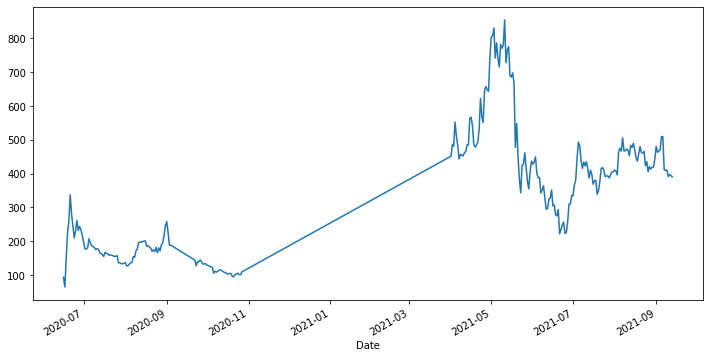

In [31]:
df['Adj Close'].plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

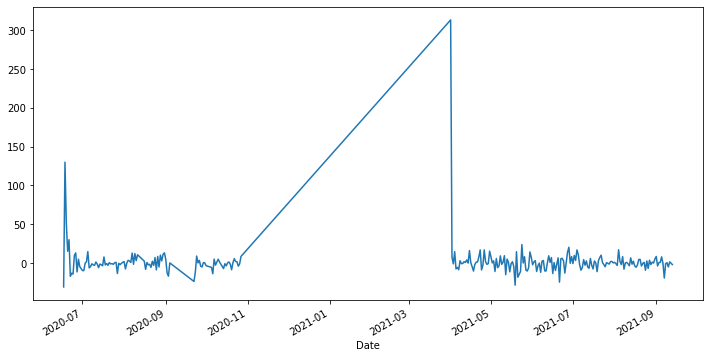

In [32]:
df['returns'].plot(figsize=(12,6))

<AxesSubplot:>

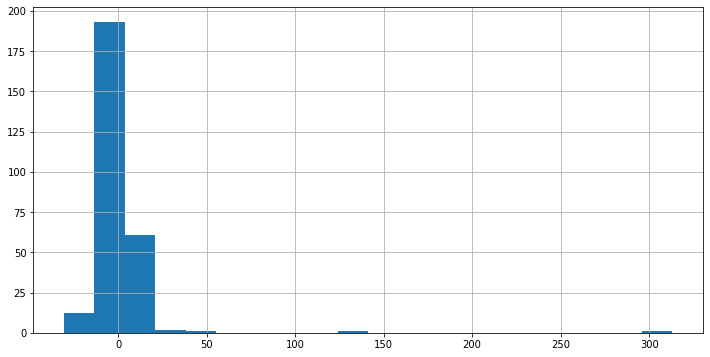

In [33]:
df['returns'].hist(figsize=(12,6), bins=20)

In [34]:
#df['falling'].plot(figsize=(12,6))

In [35]:
variable = 'returns'

In [36]:
btc_summary = df[['returns','year']].groupby('year').describe().sort_values(by=('returns', 'mean'), ascending=False)

In [37]:
btc_summary['returns', 'cv']= round(btc_summary['returns', 'std']/btc_summary['returns', 'mean']*100,2)
btc_summary['returns', 'u-std']= round(btc_summary['returns', 'mean']-1*btc_summary['returns', 'std'])
btc_summary['returns', 'LCI']= round(btc_summary['returns', 'mean']- 3*btc_summary['returns', 'std']/np.sqrt(btc_summary['returns', 'count']),2)
btc_summary['returns', 'LCS']= round(btc_summary['returns', 'mean']+ 3*btc_summary['returns', 'std']/np.sqrt(btc_summary['returns', 'count']),2)
btc_summary['returns', 'IQR']= round(btc_summary['returns', '75%']- btc_summary['returns', '25%'],2)
btc_summary['returns', '1.5_Atip_inf']= round(btc_summary['returns', '75%']- 1.5*btc_summary['returns', 'IQR'],2)
btc_summary['returns', '1.5_Atip_sup']= round(btc_summary['returns', '75%']+ 1.5*btc_summary['returns', 'IQR'],2)
#btc_summary['BTC/USDT', 'Atip_inf']= round(btc_summary['BTC/USDT', '25%']- 1.5*btc_summary['BTC/USDT', 'IQR'],2)
#btc_summary['BTC/USDT', 'Atip_sup']= round(btc_summary['BTC/USDT', '75%']+ 1.5*btc_summary['BTC/USDT', 'IQR'],2)

btc_summary

returns                                                                \
       count      mean        std        min       25%       50%       75%   
year                                                                         
2021   165.0  2.134876  25.643253 -28.354250 -3.619784  0.382815  4.194619   
2020   106.0  1.034886  15.907875 -30.647416 -4.293884 -0.333408  2.878986   

                                                                             
             max       cv u-std   LCI   LCS   IQR 1.5_Atip_inf 1.5_Atip_sup  
year                                                                         
2021  313.157290  1201.16 -24.0 -3.85  8.12  7.81        -7.52        15.91  
2020  130.012076  1537.16 -15.0 -3.60  5.67  7.17        -7.88        13.63

In [38]:
btc_summary = df[['returns','Month']]['2021'].groupby('Month').describe().sort_values(by=('returns', 'mean'), ascending=False)

<ipython-input-38-3f781bcd6855>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  btc_summary = df[['returns','Month']]['2021'].groupby('Month').describe().sort_values(by=('returns', 'mean'), ascending=False)


In [39]:
btc_summary['returns', 'cv']= round(btc_summary['returns', 'std']/btc_summary['returns', 'mean']*100,2)
btc_summary['returns', 'u-std']= round(btc_summary['returns', 'mean']-1*btc_summary['returns', 'std'])
btc_summary['returns', 'LCI']= round(btc_summary['returns', 'mean']- 3*btc_summary['returns', 'std']/np.sqrt(btc_summary['returns', 'count']),2)
btc_summary['returns', 'LCS']= round(btc_summary['returns', 'mean']+ 3*btc_summary['returns', 'std']/np.sqrt(btc_summary['returns', 'count']),2)
btc_summary['returns', 'IQR']= round(btc_summary['returns', '75%']- btc_summary['returns', '25%'],2)
btc_summary['returns', 'atip_leve']= round(btc_summary['returns', '75%']- 1.5*btc_summary['returns', 'IQR'],2)
btc_summary['returns', 'atip_extremo']= round(btc_summary['returns', '75%']- 3*btc_summary['returns', 'IQR'],2)
#btc_summary['BTC/USDT', 'Atip_inf']= round(btc_summary['BTC/USDT', '25%']- 1.5*btc_summary['BTC/USDT', 'IQR'],2)
#btc_summary['BTC/USDT', 'Atip_sup']= round(btc_summary['BTC/USDT', '75%']+ 1.5*btc_summary['BTC/USDT', 'IQR'],2)

btc_summary

returns                                                                 \
        count       mean        std        min       25%       50%       75%   
Month                                                                          
4        30.0  12.387129  57.326040 -10.159727 -1.675933  0.727640  6.704245   
7        31.0   0.800814   6.203496 -10.910517 -2.729473  0.382815  3.407996   
8        31.0   0.399927   5.172325  -9.083563 -2.580154  0.134101  2.679375   
6        30.0  -0.447240   9.266518 -24.443880 -7.874434  0.786566  5.107575   
9        12.0  -0.779506   7.048235 -19.173173 -2.228297  0.181654  1.195993   
5        31.0  -1.090678  10.985774 -28.354250 -9.527475  0.231841  6.807456   

                                                                              
              max       cv u-std    LCI    LCS    IQR atip_leve atip_extremo  
Month                                                                         
4      313.157290   462.79 -45.0 -19.01  43.79   8.38     -5.87       -18.44  
7       17.087423   774.65  -5.0  -2.54   4.14   6.14     -5.80       -15.01  
8       17.272702  1293.32  -5.0  -2.39   3.19   5.26     -5.21       -13.10  
6       20.498116 -2071.93 -10.0  -5.52   4.63  12.98    -14.36       -33.83  
9        8.647416  -904.19  -8.0  -6.88   5.32   3.42     -3.93        -9.06  
5       24.009343 -1007.24 -12.0  -7.01   4.83  16.33    -17.69       -42.18

In [40]:
variable = 'Adj Close'

In [41]:
btc_summary = round(df[[variable,'Month']]['2021'].groupby('Month').describe().sort_values(by=(variable, 'mean'), ascending=False),2)

<ipython-input-41-27cd777f1d47>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  btc_summary = round(df[[variable,'Month']]['2021'].groupby('Month').describe().sort_values(by=(variable, 'mean'), ascending=False),2)


In [42]:
btc_summary[variable, 'cv']= round(btc_summary[variable, 'std']/btc_summary[variable, 'mean']*100,2)
btc_summary[variable, 'u-std']= round(btc_summary[variable, 'mean']-1*btc_summary[variable, 'std'])
btc_summary[variable, 'LCI']= round(btc_summary[variable, 'mean']- 3*btc_summary[variable, 'std']/np.sqrt(btc_summary[variable, 'count']),2)
btc_summary[variable, 'LCS']= round(btc_summary[variable, 'mean']+ 3*btc_summary[variable, 'std']/np.sqrt(btc_summary[variable, 'count']),2)
btc_summary[variable, 'IQR']= round(btc_summary[variable, '75%']- btc_summary[variable, '25%'],2)
btc_summary[variable, '1.5_Atip_inf']= round(btc_summary[variable, '75%']- 1.5*btc_summary[variable, 'IQR'],2)
btc_summary[variable, '1.5_Atip_sup']= round(btc_summary[variable, '75%']+ 1.5*btc_summary[variable, 'IQR'],2)
#btc_summary['BTC/USDT', 'Atip_inf']= round(btc_summary['BTC/USDT', '25%']- 1.5*btc_summary['BTC/USDT', 'IQR'],2)
#btc_summary['BTC/USDT', 'Atip_sup']= round(btc_summary['BTC/USDT', '75%']+ 1.5*btc_summary['BTC/USDT', 'IQR'],2)

btc_summary

Adj Close                                                          \
          count    mean     std     min     25%     50%     75%     max   
Month                                                                     
5          31.0  617.15  174.98  342.96  431.64  689.07  773.04  854.48   
4          30.0  529.76   77.41  443.24  478.84  489.41  566.10  742.86   
8          31.0  450.52   28.59  396.05  422.10  460.37  470.26  505.93   
9          12.0  442.57   45.35  390.67  406.11  437.10  473.66  509.80   
7          31.0  402.02   35.61  333.73  379.98  398.37  416.43  492.96   
6          30.0  318.38   63.50  221.85  275.66  309.66  351.72  449.34   

                                                                       
          cv  u-std     LCI     LCS     IQR 1.5_Atip_inf 1.5_Atip_sup  
Month                                                                  
5      28.35  442.0  522.87  711.43  341.40       260.94      1285.14  
4      14.61  452.0  487.36  572.16   87.26       435.21       696.99  
8       6.35  422.0  435.12  465.92   48.16       398.02       542.50  
9      10.25  397.0  403.30  481.84   67.55       372.34       574.98  
7       8.86  366.0  382.83  421.21   36.45       361.76       471.10  
6      19.94  255.0  283.60  353.16   76.06       237.63       465.81